Sourcing and Loading Data 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [2]:
data = pd.read_csv('VideoGamesData.csv') 

In [3]:
data.head() 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail() 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Remove unneeded columns

In [5]:
df = pd.DataFrame(data, columns= ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Cleaning, transforming, and visualizing Dataframe 

In [6]:
df.dtypes 

Name             object
Platform         object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Check for/remove nulls

In [7]:
df.isnull().values.any() 

True

In [8]:
df = df.dropna() 
df.isnull().values.any() 

False

Check for/remove duplicates 

In [9]:
df.duplicated().sum() 

0

Summary 

In [10]:
df.describe() 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16663.000000,16663.000000,16663.000000,16663.000000,16663.000000
mean,0.263598,0.145202,0.077805,0.047446,0.534302
std,0.814619,0.504016,0.309306,0.186985,1.550158
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


Pre-Processing - We're going to concentrate on North American sales

In [11]:
df = pd.DataFrame(df, columns= ['Platform', 'Genre', 'Publisher', 'NA_Sales']) 
df 

,Platform,Genre,Publisher,NA_Sales
0,Wii,Sports,Nintendo,41.36
1,NES,Platform,Nintendo,29.08
2,Wii,Racing,Nintendo,15.68
3,Wii,Sports,Nintendo,15.61
4,GB,Role-Playing,Nintendo,11.27
...,...,...,...,...
16714,PS3,Action,Tecmo Koei,0.00
16715,X360,Sports,Codemasters,0.00
16716,PSV,Adventure,Idea Factory,0.00
16717,GBA,Platform,Wanadoo,0.01


Scale dataset

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# save the features we don't want to scale
var1 = df['Genre']  
var2 = df['Platform']
var3 = df['Publisher'] 

# fit scale to data 
scaler.fit(df.drop(['Platform', 'Genre', 'Publisher'], axis = 1)) 
scaled_values = scaler.transform(df.drop(['Platform', 'Genre', 'Publisher'], axis = 1)) 
df = pd.DataFrame(scaled_values) 

# merge saved features to scaled features 
df['Genre'] = var1
df['Platform'] = var2 
df['Publisher'] = var3

print(df) 

               0         Genre Platform           Publisher
0      50.450162        Sports      Wii            Nintendo
1      35.375169      Platform      NES            Nintendo
2      18.925257        Racing      Wii            Nintendo
3      18.839325        Sports      Wii            Nintendo
4      13.511518  Role-Playing       GB            Nintendo
...          ...           ...      ...                 ...
16658  -0.323594        Action     X360  Namco Bandai Games
16659  -0.323594        Sports       PC   DTP Entertainment
16660  -0.323594        Sports       DS             Ubisoft
16661  -0.311318     Adventure      PSV           Nitroplus
16662  -0.323594           NaN      NaN                 NaN

[16663 rows x 4 columns]


In [13]:
df = df.rename(columns={0: 'NA_Sales'}) 
df

,NA_Sales,Genre,Platform,Publisher
0,50.450162,Sports,Wii,Nintendo
1,35.375169,Platform,NES,Nintendo
2,18.925257,Racing,Wii,Nintendo
3,18.839325,Sports,Wii,Nintendo
4,13.511518,Role-Playing,GB,Nintendo
...,...,...,...,...
16658,-0.323594,Action,X360,Namco Bandai Games
16659,-0.323594,Sports,PC,DTP Entertainment
16660,-0.323594,Sports,DS,Ubisoft
16661,-0.311318,Adventure,PSV,Nitroplus


Create dummy features 

In [14]:
X = df[['Genre', 'Platform', 'Publisher']] 
Y = df['NA_Sales'] 
X = pd.get_dummies(data=X, drop_first=True) 

Split data into training and testing sets

In [15]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 42) 

Modeling 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

In [16]:
prac_model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
prac_model = RandomizedSearchCV(estimator = prac_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
prac_model.fit(X_train, y_train)
prac_model.best_params_ 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 72.1min finished


{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [17]:
# Model #1: Random Forest Regressor to predict sales
from sklearn.metrics import f1_score
model1 = RandomForestRegressor(n_estimators = 30, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', 
            max_depth = 110, bootstrap = False)  
model1.fit(X_train, y_train) 
y_pred = model1.predict(X_test) 

In [18]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.3410648194121638
Mean Squared Error: 1.4188720579160565
Root Mean Squared Error: 1.1911641607755232


In [19]:
# Model Feature Importance 
# get importance
importance = model1.feature_importances_ 

In [20]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01605
Feature: 1, Score: 0.01105
Feature: 2, Score: 0.01276
Feature: 3, Score: 0.04430
Feature: 4, Score: 0.01413
Feature: 5, Score: 0.03299
Feature: 6, Score: 0.02696
Feature: 7, Score: 0.07073
Feature: 8, Score: 0.00591
Feature: 9, Score: 0.01711
Feature: 10, Score: 0.00942
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00975
Feature: 13, Score: 0.00014
Feature: 14, Score: 0.01869
Feature: 15, Score: 0.05433
Feature: 16, Score: 0.01518
Feature: 17, Score: 0.00650
Feature: 18, Score: 0.00139
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00710
Feature: 21, Score: 0.09911
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00999
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00656
Feature: 26, Score: 0.00944
Feature: 27, Score: 0.00660
Feature: 28, Score: 0.00497
Feature: 29, Score: 0.01017
Feature: 30, Score: 0.00542
Feature: 31, Score: 0.00112
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.01269
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00001
Fe

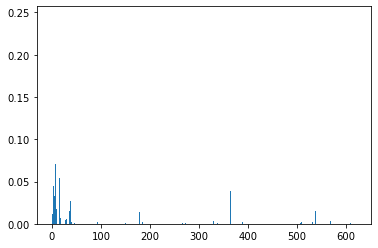

In [21]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show() 

In [22]:
def feature_importance(model, X, top):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        ordered = importances[indices].reshape(-1,)
        cols = X.columns[indices]
        return pd.DataFrame({'variables': cols[:top], 'importances':ordered[:top]}).plot.bar(x='variables', y='importances')

<AxesSubplot:xlabel='variables'>

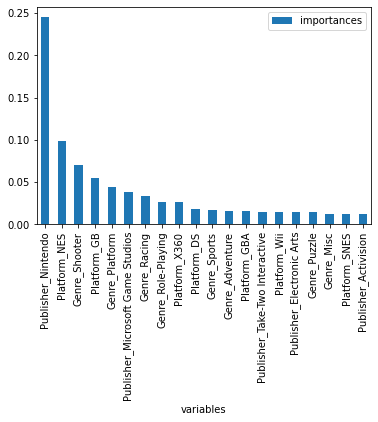

In [23]:
feature_importance(model1, X, 20) 

In [24]:
#Model #2: SVM Regressor to predict sales
from sklearn.svm import SVR 
model2 = SVR(kernel='rbf') 
model2.fit(X_train, y_train) 
y_pred = model2.predict(X_test) 

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.29969847264314853
Mean Squared Error: 1.4899946907997343
Root Mean Squared Error: 1.220653386838268


In [26]:
#Model 3 

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

In [28]:
# hypertune parameters 
prac_model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01) 
search = GridSearchCV(prac_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train) 
print('Config: %s' % results.best_params_) 

C:\Users\straw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\straw\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Config: {'alpha': 0.0}


C:\Users\straw\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4900.531261601436, tolerance: 1.1451286313418285
  model = cd_fast.enet_coordinate_descent(


In [30]:
model3 = Lasso()  
model3.fit(X_train,y_train) 
y_pred = model3.predict(X_test) 
scores = cross_val_score(model3, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) 
scores = np.absolute(scores) 
print('Mean MSE:', mean_squared_error(y_test, y_pred))   

Mean MSE: 1.5637710288767053
